In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/amazon-stocks-2025/AMZN_stock_data.csv')
data = df.copy()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [3]:
print(data.shape)
data.tail()

(6987, 8)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6982,2025-02-14 00:00:00-05:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0
6983,2025-02-18 00:00:00-05:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0
6984,2025-02-19 00:00:00-05:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0
6985,2025-02-20 00:00:00-05:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0
6986,2025-02-21 00:00:00-05:00,223.279999,223.309998,214.740005,216.580002,55161000,0.0,0.0


<Axes: >

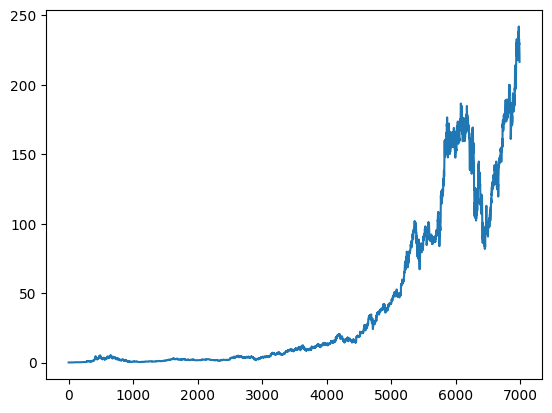

In [4]:
df.Close.plot()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'], utc=True, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6987 non-null   datetime64[ns, UTC]
 1   Open          6987 non-null   float64            
 2   High          6987 non-null   float64            
 3   Low           6987 non-null   float64            
 4   Close         6987 non-null   float64            
 5   Volume        6987 non-null   int64              
 6   Dividends     6987 non-null   float64            
 7   Stock Splits  6987 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 436.8 KB


In [7]:
data['ndate'] = data['Date'].dt.date
data['time'] = data['Date'].dt.time
data
# df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ndate,time
0,1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,1997-05-15,04:00:00
1,1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,1997-05-16,04:00:00
2,1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,1997-05-19,04:00:00
3,1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,1997-05-20,04:00:00
4,1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,1997-05-21,04:00:00
...,...,...,...,...,...,...,...,...,...,...
6982,2025-02-14 05:00:00+00:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0,2025-02-14,05:00:00
6983,2025-02-18 05:00:00+00:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0,2025-02-18,05:00:00
6984,2025-02-19 05:00:00+00:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0,2025-02-19,05:00:00
6985,2025-02-20 05:00:00+00:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0,2025-02-20,05:00:00


In [8]:
print(data.Dividends.value_counts(), data['Stock Splits'].value_counts())

Dividends
0.0    6987
Name: count, dtype: int64 Stock Splits
0.0     6983
2.0        2
3.0        1
20.0       1
Name: count, dtype: int64


In [9]:
# data[data['Stock Splits']==20.0]
# data[6300:6310]

In [10]:
data.drop(columns = ['Dividends', 'Stock Splits', 'Date'], inplace = True)

In [11]:
# data.head()
# df.head()

# XGBoost

In [12]:
data.info()
# dataxg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6987 non-null   float64
 1   High    6987 non-null   float64
 2   Low     6987 non-null   float64
 3   Close   6987 non-null   float64
 4   Volume  6987 non-null   int64  
 5   ndate   6987 non-null   object 
 6   time    6987 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 382.2+ KB


In [13]:
data.ndate = pd.to_datetime(data.ndate)

In [14]:
data['dayofweek']=data.ndate.dt.dayofweek
data['quarter']=data.ndate.dt.quarter
data['month']=data.ndate.dt.month
data['year']=data.ndate.dt.year
data['dayofyear']=data.ndate.dt.dayofyear
data.head()

,Open,High,Low,Close,Volume,ndate,time,dayofweek,quarter,month,year,dayofyear
0,0.121875,0.125000,0.096354,0.097917,1443120000,1997-05-15,04:00:00,3,2,5,1997,135
1,0.098438,0.098958,0.085417,0.086458,294000000,1997-05-16,04:00:00,4,2,5,1997,136
2,0.088021,0.088542,0.081250,0.085417,122136000,1997-05-19,04:00:00,0,2,5,1997,139
3,0.086458,0.087500,0.081771,0.081771,109344000,1997-05-20,04:00:00,1,2,5,1997,140
4,0.081771,0.082292,0.068750,0.071354,377064000,1997-05-21,04:00:00,2,2,5,1997,141


In [15]:
data = data.copy()
for lag in range(1, 30):  
    data.loc[:, f'Close_lag_{lag}'] = data['Close'].shift(lag) 
data = data.dropna()
data.drop(columns = ['ndate', 'time'], inplace=True)
data.head()

,Open,High,Low,Close,Volume,dayofweek,quarter,month,year,dayofyear,...,Close_lag_20,Close_lag_21,Close_lag_22,Close_lag_23,Close_lag_24,Close_lag_25,Close_lag_26,Close_lag_27,Close_lag_28,Close_lag_29
29,0.076042,0.076042,0.075260,0.075521,63792000,3,2,6,1997,177,...,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
30,0.075781,0.075781,0.073958,0.074479,23760000,4,2,6,1997,178,...,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
31,0.075521,0.079948,0.073958,0.077083,54936000,0,2,6,1997,181,...,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
32,0.077083,0.077083,0.075521,0.075781,25848000,1,3,7,1997,182,...,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
33,0.075781,0.079688,0.075521,0.079427,77640000,2,3,7,1997,183,...,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['Open', 'High', 'Low', 'Volume', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear'] + [f'Close_lag_{i}' for i in range(1, 30)]
data[features] = data[features].astype(float)
data.loc[:, features] = scaler.fit_transform(data[features])
data.head(3)

,Open,High,Low,Close,Volume,dayofweek,quarter,month,year,dayofyear,...,Close_lag_20,Close_lag_21,Close_lag_22,Close_lag_23,Close_lag_24,Close_lag_25,Close_lag_26,Close_lag_27,Close_lag_28,Close_lag_29
29,0.000002,0.000001,0.000005,0.075521,0.026024,0.75,0.333333,0.454545,0.0,0.480769,...,0.000019,0.000024,0.000036,0.000018,0.000000,0.000007,0.000051,0.000067,0.000072,0.000121
30,0.000001,0.000000,0.000000,0.074479,0.006749,1.00,0.333333,0.454545,0.0,0.483516,...,0.000018,0.000019,0.000025,0.000036,0.000022,0.000000,0.000007,0.000051,0.000067,0.000072
31,0.000000,0.000017,0.000000,0.077083,0.021760,0.00,0.333333,0.454545,0.0,0.491758,...,0.000020,0.000018,0.000019,0.000025,0.000040,0.000022,0.000000,0.000007,0.000051,0.000067


In [17]:
x = data.drop(columns =['Close'])
y = data.Close
split_len = int(len(x)*0.75)
split_len
xtrain, ytrain = x[:split_len], y[:split_len]
xtest, ytest = x[split_len:], y[split_len:]
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
y.tail()

(5218, 38) (5218,) (1740, 38) (1740,)


6982    228.679993
6983    226.649994
6984    226.630005
6985    222.880005
6986    216.580002
Name: Close, dtype: float64

In [18]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
preds = xgb.predict(xtest)
newpred = pd.DataFrame(data={'preds': preds, 'actual': ytest})
newpred['diff'] = abs(newpred['preds']-newpred['actual'])
newpred.sort_values('preds', ascending=False)
# newpred.head(10)

,preds,actual,diff
6248,79.354713,141.852997,62.498283
5489,79.354713,83.530998,4.176285
6498,79.344604,92.430000,13.085396
5742,79.340240,91.042999,11.702759
5490,79.335899,83.654999,4.319099
...,...,...,...
5437,73.794815,68.872498,4.922318
6222,73.791557,138.845505,65.053947
6223,73.672699,157.639496,83.966797
5441,73.208138,73.901001,0.692863


In [20]:
# newpred['preds'].plot()
# newpred['actual'].plot()
import seaborn as sns
import matplotlib.pyplot as plt
# sns.lineplot(data = newpred.preds)
# sns.lineplot(data = newpred.actual)

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(preds, ytest)
mae

56.44191644164337

- mae for xgb: 62.2051 
- with feature scaling: 56.44191

# ARIMA

In [22]:
data = df.copy()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [23]:
# arimaData
data['Date'] = pd.to_datetime(data['Date'], utc=True, errors='coerce')
data['ndate'] = data['Date'].dt.date
# data['time'] = data['Date'].dt.time
data.drop(columns = ['Dividends', 'Stock Splits', 'Date'], inplace = True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6987 non-null   float64
 1   High    6987 non-null   float64
 2   Low     6987 non-null   float64
 3   Close   6987 non-null   float64
 4   Volume  6987 non-null   int64  
 5   ndate   6987 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 327.6+ KB


,Open,High,Low,Close,Volume,ndate
0,0.121875,0.125000,0.096354,0.097917,1443120000,1997-05-15
1,0.098438,0.098958,0.085417,0.086458,294000000,1997-05-16
2,0.088021,0.088542,0.081250,0.085417,122136000,1997-05-19
3,0.086458,0.087500,0.081771,0.081771,109344000,1997-05-20
4,0.081771,0.082292,0.068750,0.071354,377064000,1997-05-21


In [24]:
data['ndate'] = pd.to_datetime(data['ndate'])
data.set_index('ndate', inplace=True)

adata = data[['Close']]
adata.head()

,Close
ndate,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354


In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(adata['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpretation:
# If p-value < 0.05: data is stationary (you can use it as-is)
# If p-value >= 0.05: data is non-stationary (you need differencing)

ADF Statistic: 1.654464248032809
p-value: 0.9980121134706945


In [26]:
# differencing
ts_data_diff = adata.diff().dropna()

# Check stationarity again
result = adfuller(ts_data_diff['Close'])
print(f'Differenced ADF Statistic: {result[0]}')
print(f'Differenced p-value: {result[1]}')
ts_data_diff

Differenced ADF Statistic: -14.6773892414494
Differenced p-value: 3.195753936964131e-27


,Close
ndate,
1997-05-16,-0.011459
1997-05-19,-0.001041
1997-05-20,-0.003646
1997-05-21,-0.010417
1997-05-22,-0.001562
...,...
2025-02-14,-1.690002
2025-02-18,-2.029999
2025-02-19,-0.019989


In [27]:
!pip install pmdarima --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.6 MB/s eta 0:00:00


In [28]:
train_size = int(len(adata)*0.70)
train_data = adata.iloc[:train_size]
test_data = adata.iloc[train_size:]

In [29]:
from pmdarima import auto_arima

model = auto_arima(train_data,
                   seasonal=False,
                   stepwise=True,
                   suppress_warnings=True,
                   trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.47 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2579.585, Time=0.46 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1224.439, Time=0.30 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.51 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2577.585, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=696.996, Time=0.76 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=408.646, Time=1.98 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=152.697, Time=2.07 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=14.898, Time=2.39 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-759.894, Time=15.28 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.79 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.30 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.29 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.42 sec

Best model:  ARIMA(5,2,1)(0,0,0)[0] intercept
Total fit time: 

- output the best (p, d, q)
- ARIMA(0,1,1) = no autoregressive (AR) terms, differencing once (d=1), one moving average (MA) term.

In [30]:
# Best model:  ARIMA(5,2,1)(0,0,0)[0] intercept

In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(5, 2, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4890
Model:                 ARIMA(5, 2, 1)   Log Likelihood                 402.847
Date:                Sat, 17 May 2025   AIC                           -791.695
Time:                        17:50:30   BIC                           -746.233
Sample:                             0   HQIC                          -775.743
                               - 4890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0004      0.005     -0.076      0.940      -0.011       0.010
ar.L2         -0.0147      0.007     -2.208      0.027      -0.028      -0.002
ar.L3         -0.0291      0.007     -4.359      0.0

In [32]:
forecast = model_fit.forecast(steps=len(test_data))

# align forecast index with test data
forecast.index = test_data.index
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f'MAE: {mae:.5f}')
print(f'RMSE: {rmse:.5f}')
forecast

MAE: 42.85407
RMSE: 53.90237


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ndate
2016-10-19     40.944784
2016-10-20     41.001084
2016-10-21     41.044099
2016-10-24     41.066082
2016-10-25     41.100054
                 ...    
2025-02-14    112.310645
2025-02-18    112.344750
2025-02-19    112.378854
2025-02-20    112.412959
2025-02-21    112.447064
Name: predicted_mean, Length: 2097, dtype: float64

- MAE: 42.85407
- RMSE: 53.90237

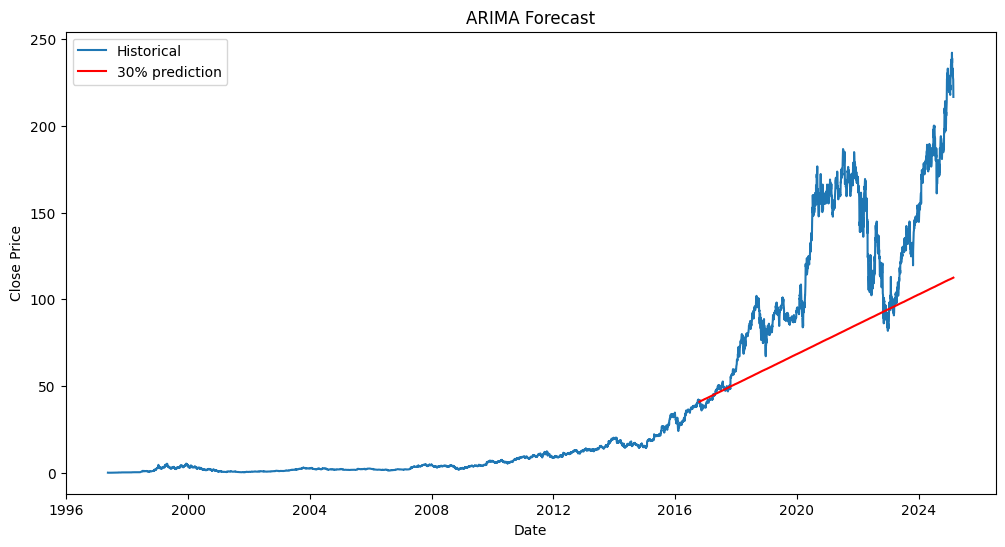

In [33]:
# forecast = model_fit.forecast(steps=30)

# Plot forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(adata, label='Historical')
plt.plot(forecast.index, forecast, label='30% prediction', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# LSTM

In [34]:
adata.info()
ldata = adata.copy()
# df.Close
ldata

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6987 entries, 1997-05-15 to 2025-02-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6987 non-null   float64
dtypes: float64(1)
memory usage: 109.2 KB


,Close
ndate,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2025-02-14,228.679993
2025-02-18,226.649994
2025-02-19,226.630005


In [35]:
dataset = np.array(ldata).reshape(-1,1)
tlen = int(len(dataset)*0.95)
# tlen
dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleddata = scaler.fit_transform(dataset)
traindata = scaleddata[:tlen]
traindata

array([[-0.69832139],
       [-0.69851855],
       [-0.69853646],
       ...,
       [ 1.46754061],
       [ 1.46754061],
       [ 1.46754061]])

In [36]:
xtrain, ytrain = [], []
for i in range(60, tlen):
    xtrain.append(traindata[i-60:i, 0])
    ytrain.append(traindata[i,0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
# xtrain[:2]

In [37]:
print(xtrain.shape)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
print(xtrain.shape)
print(ytrain.shape)

(6577, 60)
(6577, 60, 1)
(6577,)


In [38]:
# train_size
# traindata = pd.DataFrame(ldata['Close'][0:train_size])
# testdata = pd.DataFrame(ldata['Close'][train_size:len(ldata)])
# print(traindata.shape, testdata.shape)

In [39]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_traindata = scaler.fit_transform(traindata)
# print(traindata.head(), scaled_traindata[:5])

In [40]:
# xtrain, ytrain =[], []
# for i in range(100, traindata.shape[0]):
#     xtrain.append(scaled_traindata[i-100:i])
#     ytrain.append(scaled_traindata[i,0])
# xtrain, ytrain = np.array(xtrain), np.array(ytrain)
# print(xtrain.shape, ytrain.shape, xtest.shape)

In [41]:
# xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
# xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
# ytrain = ytrain.reshape(-1, 1)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(6577, 60, 1) (1740, 38) (6577,) (1740,)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# defining the model using Sequential and a list of layers
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(xtrain.shape[1], 1)),
    LSTM(64, return_sequences=False),
    # LSTM(128, return_sequences=False),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1)
])

model.summary()

2025-05-17 17:50:33.345616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747504233.613091      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747504233.687028      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-17 17:50:49.191861: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.metrics import RootMeanSquaredError

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',
             metrics=[RootMeanSquaredError()])

# Fit the model 
model.fit(xtrain, ytrain, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 0.0805 - root_mean_squared_error: 0.2655
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0193 - root_mean_squared_error: 0.1387
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0174 - root_mean_squared_error: 0.1316
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0183 - root_mean_squared_error: 0.1350
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0164 - root_mean_squared_error: 0.1279
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0168 - root_mean_squared_error: 0.1295
Epoch 9/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0159 - root_mean_squared_error: 0.1262
Epoch 10/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0161 - r

In [44]:
test_data = scaleddata[tlen - 60:]
xtest, ytest = [], dataset[tlen:]

for i in range(60, len(test_data)):
    xtest.append(test_data[i-60:i, 0])
    
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
print(xtest.shape, ytest.shape)

(350, 60, 1) (350, 1)


In [45]:
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [46]:
predictions.shape
ytest.shape
newpred = pd.DataFrame(data={'preds': predictions.flatten(), 'actual': ytest.flatten()})
newpred

,preds,actual
0,129.538116,127.120003
1,129.958237,129.460007
2,131.494049,124.720001
3,129.980164,127.000000
4,129.981476,125.959999
...,...,...
345,222.408585,228.679993
346,221.664536,226.649994
347,220.307861,226.630005
348,219.846222,222.880005


In [47]:
mae_lstm = mean_absolute_error(newpred.preds, newpred.actual)
mae_lstm

3.3877800859723775

mae for lstm: 6.85138

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

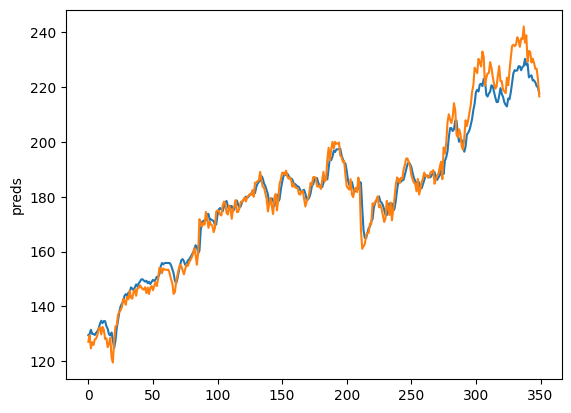

In [48]:
sns.lineplot(data=newpred.preds)
sns.lineplot(data=newpred.actual)
plt.show()